## Project Statement
You should implement an algorithm for computing the RF distance between two unrooted evolutionary trees over the same set of species. The algorithm can e.g. be Day's algorithm as explained in class. You should make a program called rfdist which as input takes two evolutionary trees in Newick format (also referred to as 'New Hampshire format'), and outputs the RF distance between them.

The archive testdata.zip contains two trees with RF-distance 8. These can e.g. be used for testing.
## Experiment

The programs QuickTree and RapidNJ are implementations of the NJ methods. QuickTree implements the basic cubic time algorithm while RapidNJ implements an algorithm the is faster in practice. You might want to take a look at the QuickTree paper and the RapidNJ paper.

Downloading quicktree_2.0.tar.gz and rapidnj-src-2.3.2.zip and compiling on a Linux-platform is straightforward (just run 'make'). 

The file patbase_aibtas.fasta contains 395 protein sequences from the P-Type ATPase Database in Fasta-format.

You should make an experiment where you first construct a number of trees for these 395 sequences using NJ (as implemented in QuickTree and RapidNJ) based on different multiple alignments of the 395 sequences, and secondly, compare the construted trees using your program rfdist in order to investigate the influence of using different multiple alignment methods and tree reconstruction methods. Biologically, the 395 sequences are grouped into five groups. The group which a sequenence belongs to is indicated by the first character (1-5) in its name in Fasta-file. If you visualize your constructed trees using e.g. the program Dendroscope, you might want to inspect to what extend sequences from one group are in the same subtree.

The alignment methods you most use are:

Clustal Omega: https://www.ebi.ac.uk/jdispatcher/msa/clustalo

Kalign: https://www.ebi.ac.uk/jdispatcher/msa/kalign

MUSCLE: https://www.ebi.ac.uk/jdispatcher/msa/muscle

You should use the default parameters of each program. Beware of the output format. QuickTree can only read multiple alignments in Stockholm-format, and RapidNJ can read multiple alignments in both Fasta- and single line Stockholm-format.

Converting to Stockholm-format: You can use the online converter available at http://hcv.lanl.gov/content/sequence/FORMAT_CONVERSION/form.html to convert different alignment formats to Stockholm- and Fasta-format. To convert to single line Stockholm-format, you must set the 'Output line width' to 'as wide as possible'. Update (Apr 2021): It seems that QuickTree 2.0 cannot read the Stockholm-format produced by the online converter. The problem is that the Stockholm-file constructed by the online converter starts with the line "# STOCKHOLM 1.0" follow by an empty line. If you remove these two lines, then QuickTree 2.0 can read the file. I do not know when this "bug" was introduced, but it used to work ;-)

*Experiment 1:* For each alignment method (Clustal Omega, Kalign, MUSCLE), you build a NJ tree using QuickTree and RapidNJ, and compute the RF-distance between each combination of these six trees. The outcome of your experiment, is an 6x6 table showing the RF-distance between each pair of constructed trees. (You might want to use the program Dendroscope to visualize the constructed trees.)

*Experiment 2:* Redo the above experiment where you use 395 input sequences in patbase_aibtas_permuted.fasta. This yields another 6x6 table.

*Experiment 3:* Compute the RF-distance between the trees produced in 'Experiment 1' and 'Experiment 2' using the same alignment and tree reconstruction method. This yields 6 distances.

Note: Depending on your Newick-parser, you might have problems comparing trees constructed by QuickTree and RapidNJ. The reason is that RapidNJ encloses the leaf names in apostrophes, while QuickTree does not. See e.g. these examples of a QuickTree newick output (quicktree.newick) and a RapidNJ newick output (rapidnj.newick) with names enclosed in apostrophes. It is easy to solve the problem by removing all apostrophes from the RapidNJ output. On a Unix-system like Linux or Mac OS X, you can easily do this by piping the output of RapidNJ through sed like this: rapidnj -i sth somealignment.stockholm | sed -e "s/'//g" > tree_without_apostrophes.newick

## Report

You (i.e. your group) must hand in a report (in pdf-format) and your implementation of rfdist (in a zip-archive) via Brightspace no later than Tuesday, April 16, 2024, at 23:59. Your report should be no more than 3 pages, and must cover:

Status of your work.

A short description of your implementation of rfdist, explaning what algorithm you implemented, how you read in trees in Newick-format, how you validated the correctness of your implementation, and how to access and run your program rfdist.
References to the 6 alignments (in Stockholm-format) and trees (in Newick-format) that you have produced in Experiment 1 and 2.
Your results of Experiment 1-3, i.e. an 6x6 table showing the RF-distance between each pair of constructed trees based on the patbase_aibtas.fasta, an 6x6 table showing the RF-distance between each pair of constructed trees based on the patbase_aibtas_permuted.fasta, and a 1x6 table showing the RF-distance between the trees constructed based on the same alignment and NJ method for normal and the permuted dataset. Comment on your results. Is everything as expected, or are you surprised?


## Day's algorithm 

In [174]:
from Bio import Phylo
tree1 = Phylo.read("../Testdata/tree1.new", "newick", rooted=True)
tree2 = Phylo.read("../Testdata/tree2.new", "newick", rooted=True)

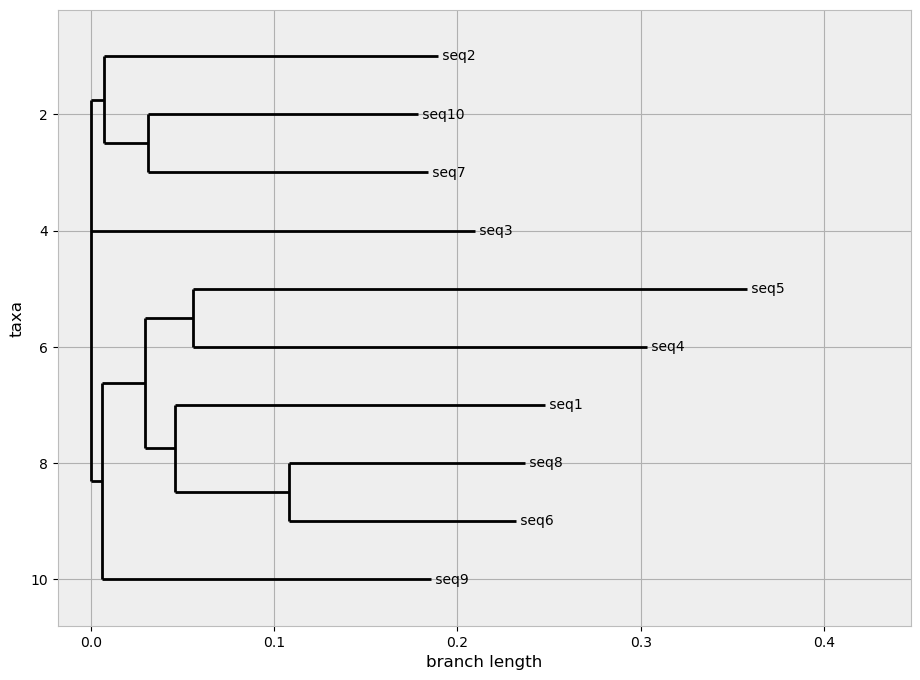

In [175]:
Phylo.draw(tree1)

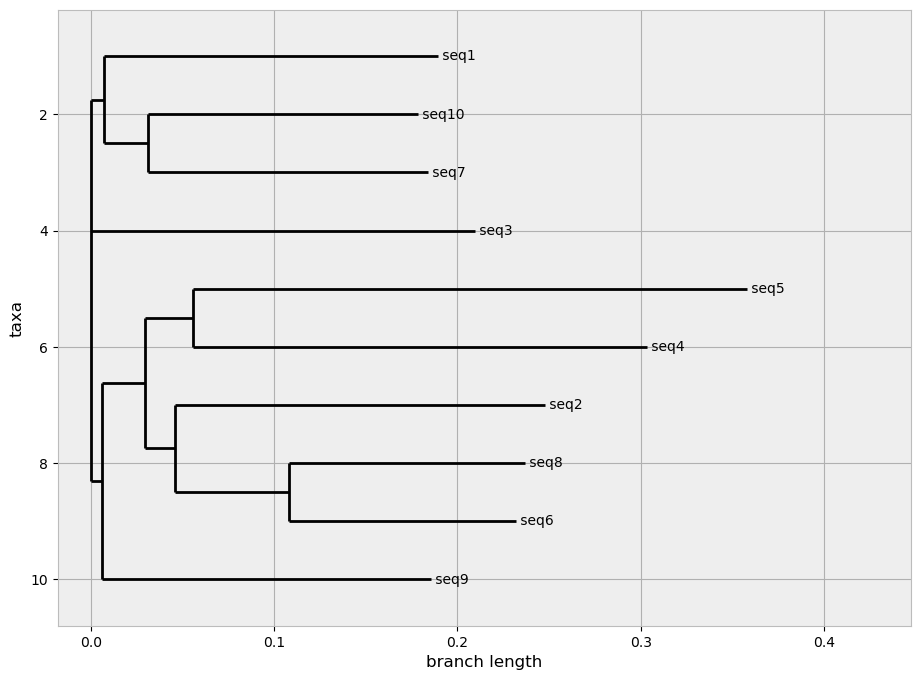

In [176]:
Phylo.draw(tree2)

In [177]:
tree1.root.clades[2]

Clade(branch_length=0.00628)

In [182]:
class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.order = None
        self.children_range = None
    # method to assign the order named node and all its named children, depth first
    def assign_order(self):
        if self.name:
            self.order = order
        order += 1
        for child in self.children:
            child.assign_order(order)
    # method to return the number of children
    def num_children(self):
        return len(self.children)
    # method to return the orders of all named children below a node
    def children_orders(self):
        return [child.order for child in self.children]
    # method to return the range of children
    def children_range(self):
        return [child.children_range for child in self.children]

def convert_to_node(clade):
    node = Node(clade.name)
    for child_clade in clade.clades:
        node.children.append(convert_to_node(child_clade))
    return node

root_node = convert_to_node(tree1.root)


In [183]:
root_node.assign_order()
# print the children of the root node

In [149]:
order = 0

def assign_order(node):
    global order
    if node.name:
        node.order = order
        order += 1
    for child in node.children:
        assign_order(child)

assign_order(root_node)


In [184]:
# print all of the names and their orders
def print_orders(node):
    if node.name:
        print(node.name, node.order)
    for child in node.children:
        print_orders(child)
print_orders(root_node)

seq2 2
seq10 3
seq7 3
seq3 1
seq5 4
seq4 4
seq1 4
seq8 5
seq6 5
seq9 2


In [151]:
# make a dictionary of names and orders
def make_dict(node):
    d = {}
    d[node.name] = node.order
    for child in node.children:
        d.update(make_dict(child))
    return d

d1 = make_dict(root_node)


In [152]:
d1

{None: None,
 'seq2': 0,
 'seq10': 1,
 'seq7': 2,
 'seq3': 3,
 'seq5': 4,
 'seq4': 5,
 'seq1': 6,
 'seq8': 7,
 'seq6': 8,
 'seq9': 9}

In [153]:
# convert tree2 to a node
root_node2 = convert_to_node(tree2.root)
# use the same order as tree1 by referencing d1
def assign_order2(node):
    if node.name:
        node.order = d1[node.name]
    for child in node.children:
        assign_order2(child)
assign_order2(root_node2)

In [154]:
def get_terminal_nodes(node):
    if not node.children:
        return [node.name]
    else:
        return sum([get_terminal_nodes(child) for child in node.children], [])

None None
None None
seq1 6
None None
seq10 1
seq7 2
seq3 3
None None
None None
None None
seq5 4
seq4 5
None None
seq2 0
None None
seq8 7
seq6 8
seq9 9


In [155]:
# for every node that does not havea name, except the root, assign its children_range 
# to be the range of orders in its terminal children only if max_order - min_order +1 == len(children)
# if that is false, assign its children_range to be False
def assign_children_range(node):
    if not node.name:
        if node.children:
            min_order = node.children[0].order
            max_order = node.children[-1].order
            if max_order - min_order + 1 == len(node.children):
                node.children_range = (min_order, max_order)
            else:
                node.children_range = False
    for child in node.children:
        assign_children_range(child)

In [157]:
# print the orders, names, and children_range
def print_orders_and_children_range(node):
    print(node.name, node.order, node.children_range)
    for child in node.children:
        print_orders_and_children_range(child)
print_orders_and_children_range(root_node2)

None None None
None None None
seq1 6 None
None None None
seq10 1 None
seq7 2 None
seq3 3 None
None None None
None None None
None None None
seq5 4 None
seq4 5 None
None None None
seq2 0 None
None None None
seq8 7 None
seq6 8 None
seq9 9 None


In [85]:
# check each clade in tree2 with:
# if max - min + 1 == len(clade_dict), then the clade is a subset of tree1
# RF = len(tree1) + len(tree2) - 2 * (number of common clades)

common_clades = 0
for clade in tree2.find_clades():
    if clade.name:
        if clade.name[1] in clade_dict.values():
            common_clades += 1
